# HTE on `Re78` - `Re75` (Observational Data)

We're using the causal tree package here to calculate the HTE.

In [1]:
import pandas as pd
from CTL.causal_tree_learn import CausalTree
from IPython.display import Image

In [2]:
lalonde_psid = pd.read_csv("../data/lalonde_psid.csv")
lalonde_psid["diff"] = lalonde_psid["re78"] - lalonde_psid["re75"]
lalonde_psid.drop(["nodegree", "u75", "u74"], axis=1, inplace=True)
treatment = lalonde_psid["treat"].values

In [3]:
y = lalonde_psid["diff"].values
x = lalonde_psid.drop(["treat", "re78", "diff"], axis=1).values
columns = lalonde_psid.drop(["treat", "re78"], axis=1).columns

In [4]:
def makeTree(x, y, treatment):
    ctl = CausalTree(magnitude=False)
    ctl.fit(x, y, treatment)
    ctl.prune()
    ctl.plot_tree(features=columns, filename="../output/bin_tree", show_effect=True)

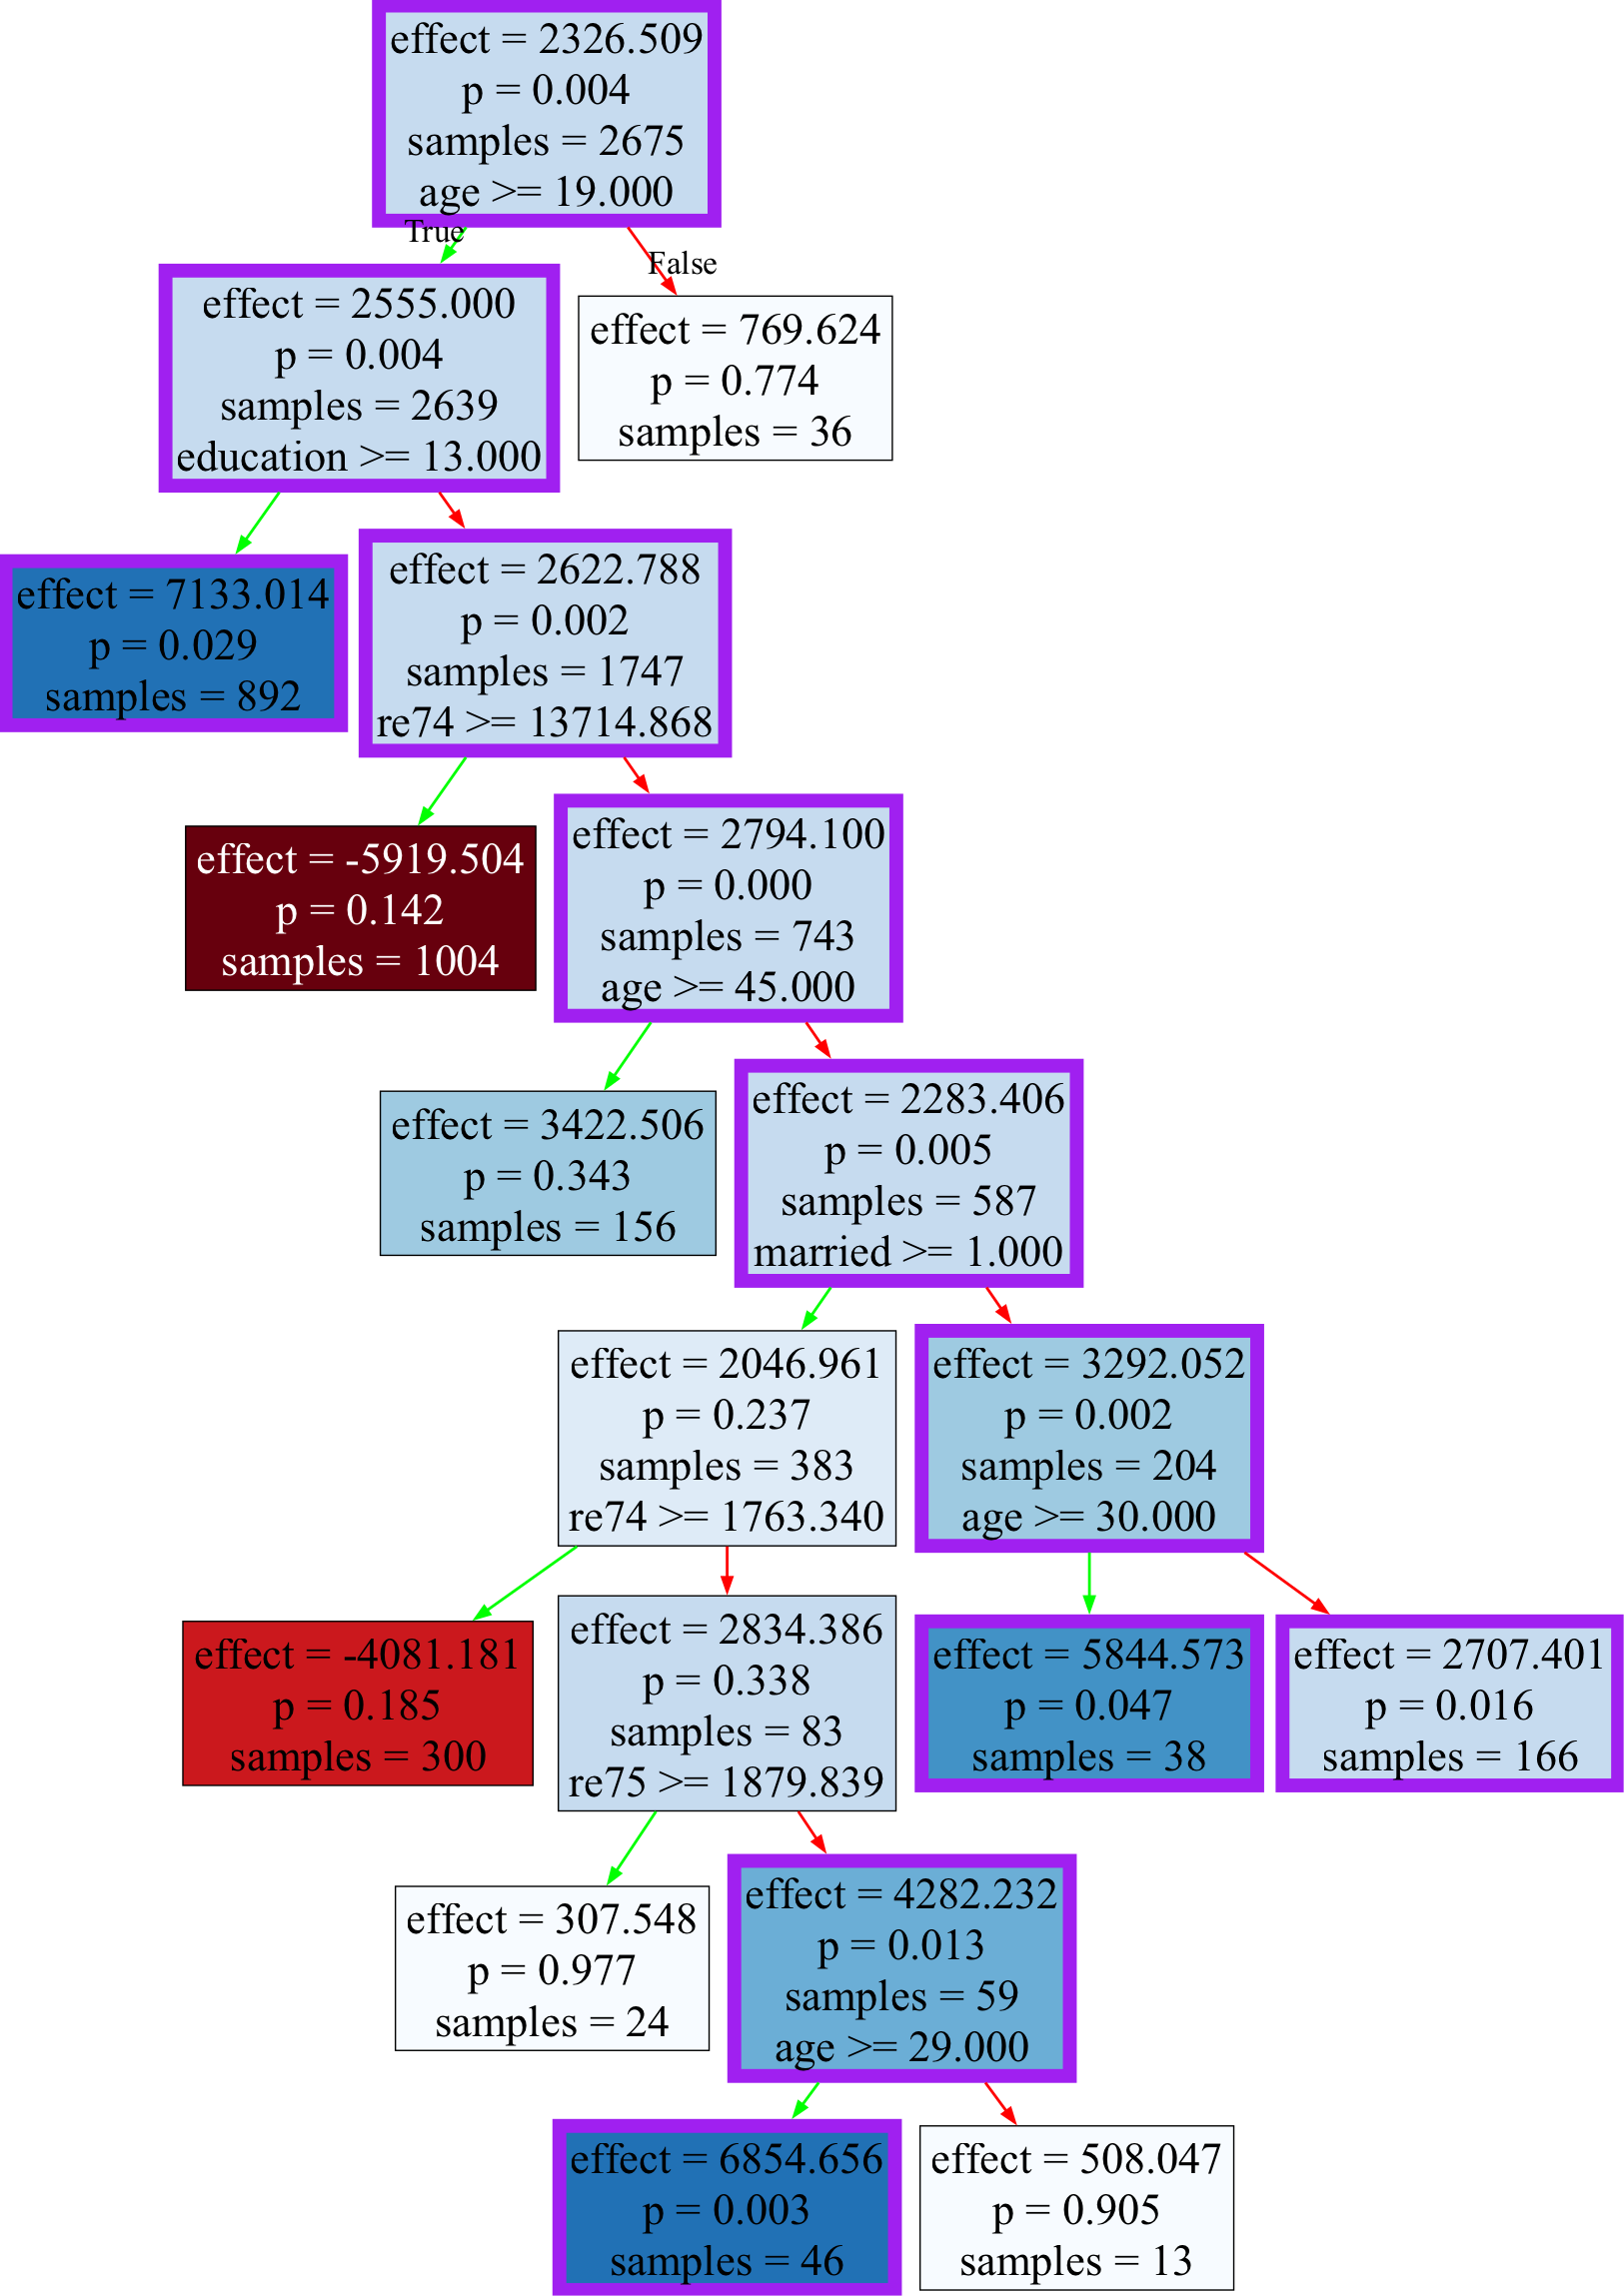

In [5]:
makeTree(x, y, treatment)
img = Image(filename="../output/bin_tree.png", width=700)
display(img)